<a href="https://colab.research.google.com/github/HecVelaz/Codigos-de-Algoritmos--Ejemplos-variados/blob/main/TP7/HectorVelazquez_Tarea7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nombre: Hector Velazquez

In [3]:
pip install networkx #instalacion para el uso de la biblioteca networkx

In [4]:
import networkx as nx
import matplotlib.pyplot as plt #utilizado para graficar

In [5]:
class Grafo:
  def __init__(self):
    self.vertices={} #diccionario que almacena vertices

  def add_arista(self,u,v):#funcion para agregar arista, agrega 2 vertices como vecinos entre si
    if u not in self.vertices:#si u no esta en el dicc se crea una lista
      self.vertices[u] = []
    if v not in self.vertices:
      self.vertices[v] = [] #lo mismo con vertices, se crea una lista nueva
      #v y u vecinos y viceversa (Grafo no dirigido)
    self.vertices[u].append(v)
    self.vertices[v].append(u)

  def DFS(self,v,visitados,arbol_actual):#metodo dfs para recorrido en el arbol
    visitados.add(v)#vertice v visitado
    arbol_actual.append(v)#se agrega v al arbol
    for vecino in self.vertices[v]:#itera por los vecinos del vertice v en el grafo
      if vecino not in visitados:
    #si el vecino no se visitó se llama recursivamente a la funcion Dfs con el vecino como punto de partida
        self.DFS(vecino,visitados,arbol_actual)

  def contar_arboles(self):
    visitados=set()#conjunto para guardar vertices visitados
    n_arboles= 0#ini con 0
    for v in self.vertices:#recorremos todos los vertices del grafo
      if v not in visitados:#para cada vertice no visitado, se crea un arbol nuevo
        arbol_actual=[]#lista arbol actual
        self.DFS(v, visitados,arbol_actual)#llamamos a la funcion recorrido
        n_arboles=n_arboles+1#se incrementa el nro de arboles
    return n_arboles#retorna num de arboles




Entrada:
5
1 2
1 3
4 5
-1
Salida:

2


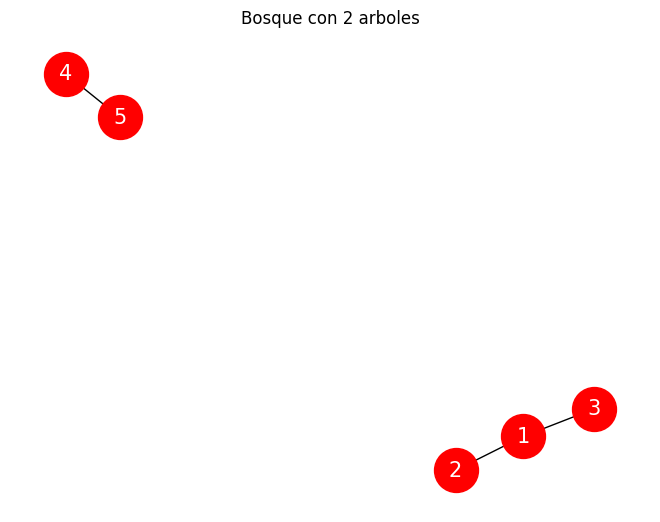

In [6]:
# Definir una lista para almacenar las aristas
aristas = []  # para graficar el bosque con los árboles de entrada

# Solicitar al usuario que ingrese el número de nodos
while True:
    entrada_nodos = input("Entrada:\n")
    try:
        n_nodos = int(entrada_nodos)
        if n_nodos <= 0:
            print("El número de nodos debe ser mayor que 0. Inténtelo de nuevo.")
            continue
        break
    except ValueError:
        print("Entrada inválida. Por favor, ingrese un número entero positivo.")

# Solicitar al usuario que ingrese las aristas del bosque
# Para validación de la entrada cantidad de nodos a introducir
nodos_ingresados = 0
while nodos_ingresados < n_nodos:
    entrada_arista = input().split()
    if entrada_arista[0] == '-1':
        if nodos_ingresados != n_nodos:
            print(f"Se esperaban {n_nodos} nodos. Terminando la entrada.")
        break
    if len(entrada_arista) != 2:
        print("Se esperaban dos números separados por un espacio. Inténtelo de nuevo.")
        continue
    u, v = map(int, entrada_arista)
    aristas.append((u, v))#se agregan los datos ingresados a la lista aristas para poder graficarlos
    nodos_ingresados = len(set(sum(aristas, ())))
    if nodos_ingresados > n_nodos:
        print(f"Se han ingresado más de {n_nodos} nodos. Inténtelo de nuevo.")
        aristas.pop()  # Eliminar la última arista ingresada
        continue
# Verificar si se han ingresado la cantidad correcta de nodos
if nodos_ingresados != n_nodos:
    exit()

print('-1')

# Crear el bosque con las aristas proporcionadas
bosque = Grafo()
for u, v in aristas:
    bosque.add_arista(u, v)

# Calcular y mostrar el número de árboles en el bosque
n_arboles = bosque.contar_arboles()
print('Salida:\n')
print(n_arboles)

##Grafico del bosque de entrada con la salida de arboles

G = nx.Graph()
G.add_edges_from(aristas)
nx.draw(G, with_labels=True, node_size=1000, font_size=15, node_color='red', font_color='white')
plt.title("Bosque con "+ str(n_arboles) +" arboles")
plt.show()
